In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
data = pd.read_csv('transactions.csv',
                  index_col=0)
data

,a,c,d,e,k,m,n,o,u,y,co
transaction,,,,,,,,,,,
100,0,0,0,1,1,1,1,1,0,1,0
200,0,0,1,1,1,0,1,1,0,1,0
300,1,0,0,1,1,1,0,0,0,0,0
400,0,1,0,0,1,1,0,0,1,1,0
500,0,0,0,1,1,0,0,1,0,1,1


<AxesSubplot:xlabel='transaction'>

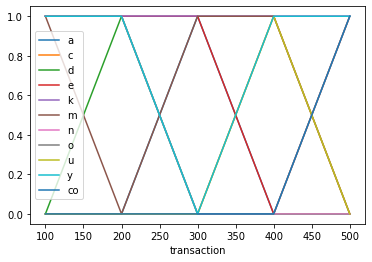

In [4]:
data.plot()

In [3]:
freq_item = apriori(data,
                    min_support=0.06,
                    use_colnames=True)
rules = association_rules(freq_item,
                         metric='confidence',
                         min_threshold=0.8)
rules.head()

C:\Users\David's PC\AppData\Roaming\Python\Python38\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(a),(e),0.2,0.8,0.2,1.0,1.250000,0.04,inf
1,(a),(k),0.2,1.0,0.2,1.0,1.000000,0.00,inf
2,(a),(m),0.2,0.6,0.2,1.0,1.666667,0.08,inf
3,(c),(k),0.2,1.0,0.2,1.0,1.000000,0.00,inf
4,(c),(m),0.2,0.6,0.2,1.0,1.666667,0.08,inf
